# Búsqueda Aleatoria

El   Algoritmo   de   Búsqueda   Aleatoria   (BA)   consistirá   simplemente   en   generar aleatoriamente  una  solución  en  cada  iteración.  
La  búsqueda aleatoria  completa  debe  ejecutarse  10  veces,  cada  vez  con  una  semilla distinta  (por  tanto,  se  deben  anotar  las  10  semillas  que  se  utilizarán  sistemáticamente), para  el  generador  aleatorio,  y  para  cada  conjunto  de  datos con 1600·n llamadasa  la función de evaluación.

---
## Librerías
- matplotlib: necesaria para la representación de la solución.
- pandas: necesaria para la representación de resultados.
- random: necesaria para el control de números aleatorios.
- datetime: necesaria para la obtención de una semilla inicial que genere las demás semillas.
- multiprocessing: necesaria para la ejecución concurrente de las soluciones.
- itertools: necesaria para combinar las semillas con los dataset en la ejecución concurrente.
- ipynb: necesaria para cargar la función busqueda_aleatorio de otro fichero. Esto permite la ejecución concurrente en Jupyter.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from random import seed
from random import randint
from datetime import datetime
from multiprocessing import Pool, TimeoutError
import itertools
from ipynb.fs.full.algoritmo import busqueda_aleatoria

---
## Funciones auxiliares
- cargar_fichero(nombre_fichero): devuelve un array con las ciudades almacenadas en el fichero. [ [ ciudad, posición x , posición y ] [...] ... ]
- calcular_distancia_euclidea(node_1,node_2): devuelve en la distancia entre las dos ciudades.
- dibujar_flecha(A, B): dibuja una flecha entre el punto A y B apuntando a B. 
- representacion(camino, nombre, distancia): representa las ciudades y el camino calculado.
- representacion_datos(result,nombre): representa la solución obtenida de la ejecución concurrente de un dataset.

In [2]:
def cargar_fichero(nombre_fichero):
    
    fichero = open( "../Dataset/" + nombre_fichero + ".tsp", 'r')
    
    for i in range(3):
        fichero.readline()
        
    numero_de_ciudades = fichero.readline().strip().split()[1]
    
    for i in range(2):
        fichero.readline()
        
    ciudades = []
    for i in range(0, int(numero_de_ciudades)):
        ciudad,x,y = fichero.readline().strip().split()[:]
        ciudades.append([int(ciudad),float(x),float(y)])  
        
    fichero.close()
    
    return ciudades

In [3]:
def calcular_distancia_euclidea(ciudad_1,ciudad_2):
    
    x1,y1 = ciudad_1[1 :]
    x2,y2 = ciudad_2[1 :]
    
    xd = x1 - x2
    yd = y1 - y2
    
    return round(math.sqrt( xd*xd + yd*yd ))

In [4]:
def dibujar_flecha(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=1.3, length_includes_head=True)

In [5]:
def representacion(camino, nombre, distancia):
    
    plt.figure(figsize=(10,10))
    
    for i in range(len(camino)):
        if(i == 0):
            plt.plot(camino[i][1], camino[i][2] , "o", color="green")
        else:
            plt.plot(camino[i][1], camino[i][2] , "*", color="red")
        
        if(i<len(camino)-1):
            dibujar_flecha([camino[i][1], camino[i][2]],[camino[i+1][1], camino[i+1][2]])
        else:
            dibujar_flecha([camino[i][1], camino[i][2]],[camino[0][1], camino[0][2]])
    
    plt.title(nombre + " : " + str(distancia))

In [6]:
def representacion_datos(result,nombre):
    semilla_coste = pd.DataFrame(columns=["Semilla","Coste","Nº de evaluaciones"])
    for i in range(10):
        semilla_coste.loc[len(semilla_coste)] = [semillas[i],result[i][1],1600*len(dataset)]
    display(semilla_coste)

    print("Media coste: ", semilla_coste[['Coste']].mean()[0])
    print("Desviación típica coste: ", semilla_coste[['Coste']].std()[0])
    print("Media nº de evaluaciones: ", semilla_coste[['Nº de evaluaciones']].mean()[0])
    print("Desviación típica nº de evaluaciones: ", semilla_coste[['Nº de evaluaciones']].std()[0])


    print()
    print("Representación de la mejor solución: ")
    indice = semilla_coste[['Coste']].idxmin()[0]


    representacion(result[indice][0], nombre, result[indice][1])

---
## Función de evaluación
Esta función genera el coste total de la solución pasara por parámetro. Para ello recorre todas las ciudades de la solución sumando el coste entre ellas. 

In [7]:
def funcion_de_evaluacion(solucion):
    coste = 0
    for indice in range(len(solucion)-1):
        coste += calcular_distancia_euclidea(solucion[indice],solucion[indice+1])
    coste += calcular_distancia_euclidea(solucion[-1],solucion[0])
    return coste

---
## Lectura de ficheros y ejecución del algoritmo
Para poder ejecutar correctamente el algoritmo de forma concurrente en Jupyter, este debe ser cargado de forma externa. Para ello se ha usado la librería ipynb.

In [8]:
st70 = cargar_fichero("st70")
ch130 = cargar_fichero("ch130")
a280 = cargar_fichero("a280")
p654 = cargar_fichero("p654")
vm1084 = cargar_fichero("vm1084")
vm1748 = cargar_fichero("vm1748")

### Generación de semillas

In [9]:
semillas = []
dt = datetime.now()
for i in range(10):
    semillas.append(randint(0,dt.microsecond))
print("Semillas generadas:")
print(semillas)

Semillas generadas:
[581593, 66582, 305940, 310753, 423300, 266953, 330846, 99192, 583908, 313619]


### st70

,Semilla,Coste,Nº de evaluaciones
0,581593.0,2851.0,112000.0
1,66582.0,2865.0,112000.0
2,305940.0,2742.0,112000.0
3,310753.0,2875.0,112000.0
4,423300.0,2841.0,112000.0
5,266953.0,2693.0,112000.0
6,330846.0,2855.0,112000.0
7,99192.0,2924.0,112000.0
8,583908.0,2893.0,112000.0
9,313619.0,2886.0,112000.0


Media coste:  2842.5
Desviación típica coste:  70.9683027837076
Media nº de evaluaciones:  112000.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


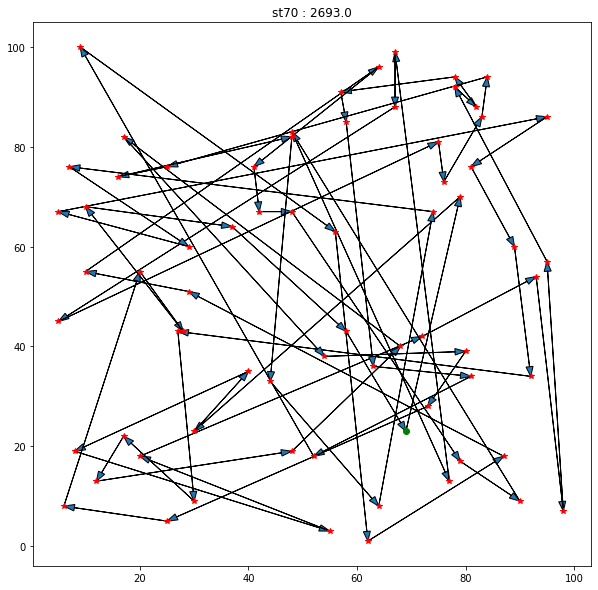

In [10]:
dataset = st70

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"st70")

### ch130


,Semilla,Coste,Nº de evaluaciones
0,581593.0,39280.0,208000.0
1,66582.0,38708.0,208000.0
2,305940.0,38105.0,208000.0
3,310753.0,39050.0,208000.0
4,423300.0,38592.0,208000.0
5,266953.0,38810.0,208000.0
6,330846.0,38229.0,208000.0
7,99192.0,38464.0,208000.0
8,583908.0,38844.0,208000.0
9,313619.0,38400.0,208000.0


Media coste:  38648.2
Desviación típica coste:  364.8734331548711
Media nº de evaluaciones:  208000.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


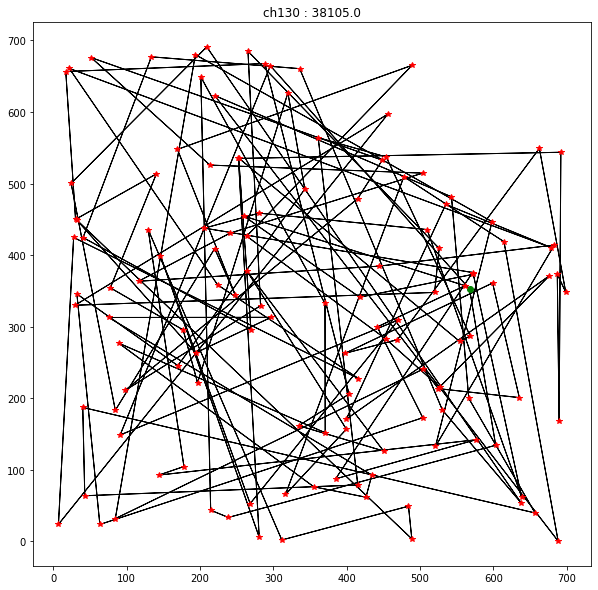

In [11]:
dataset = ch130

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"ch130")

### a280

,Semilla,Coste,Nº de evaluaciones
0,581593.0,29488.0,448000.0
1,66582.0,29794.0,448000.0
2,305940.0,29896.0,448000.0
3,310753.0,29661.0,448000.0
4,423300.0,29443.0,448000.0
5,266953.0,29960.0,448000.0
6,330846.0,29688.0,448000.0
7,99192.0,29935.0,448000.0
8,583908.0,29566.0,448000.0
9,313619.0,29395.0,448000.0


Media coste:  29682.6
Desviación típica coste:  208.35023931405075
Media nº de evaluaciones:  448000.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


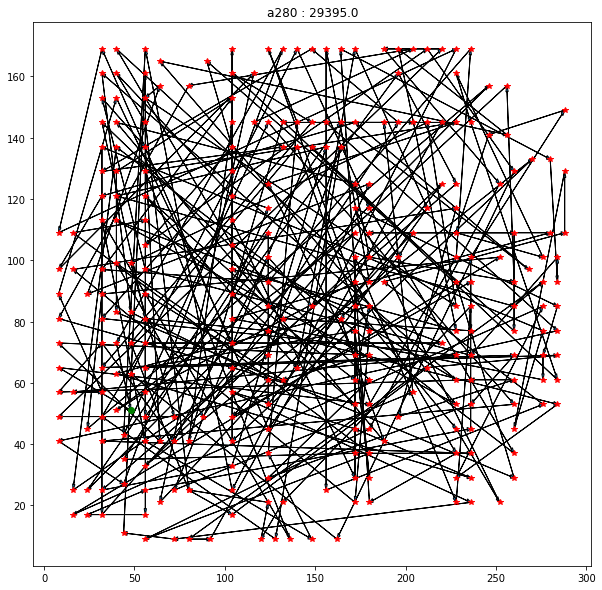

In [12]:
dataset = a280

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"a280")

### p654

,Semilla,Coste,Nº de evaluaciones
0,581593.0,1825060.0,1046400.0
1,66582.0,1816918.0,1046400.0
2,305940.0,1804077.0,1046400.0
3,310753.0,1818787.0,1046400.0
4,423300.0,1818431.0,1046400.0
5,266953.0,1826148.0,1046400.0
6,330846.0,1805498.0,1046400.0
7,99192.0,1802974.0,1046400.0
8,583908.0,1810558.0,1046400.0
9,313619.0,1826212.0,1046400.0


Media coste:  1815466.3
Desviación típica coste:  9145.514493151517
Media nº de evaluaciones:  1046400.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


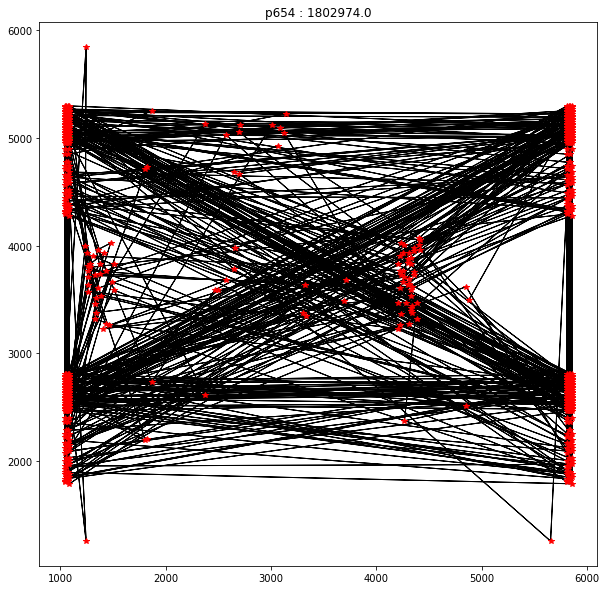

In [13]:
dataset = p654

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"p654")

### vm1084

,Semilla,Coste,Nº de evaluaciones
0,581593.0,7988347.0,1734400.0
1,66582.0,7994904.0,1734400.0
2,305940.0,7973658.0,1734400.0
3,310753.0,7904900.0,1734400.0
4,423300.0,7980578.0,1734400.0
5,266953.0,7964686.0,1734400.0
6,330846.0,7965223.0,1734400.0
7,99192.0,7997710.0,1734400.0
8,583908.0,7980577.0,1734400.0
9,313619.0,7977836.0,1734400.0


Media coste:  7972841.9
Desviación típica coste:  26313.327774047215
Media nº de evaluaciones:  1734400.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


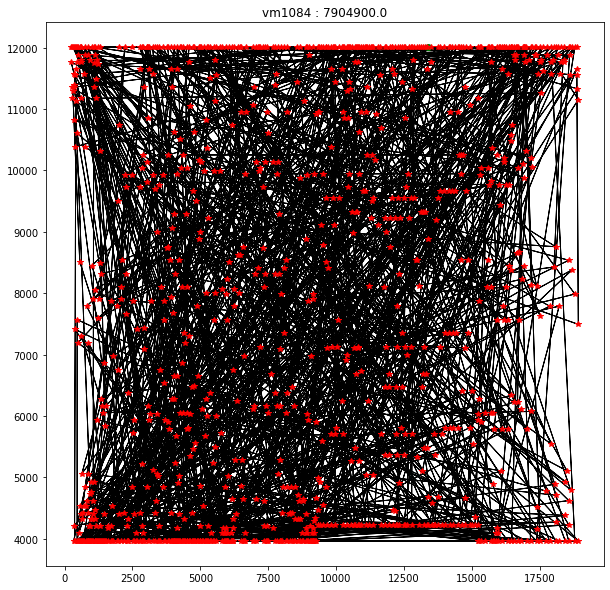

In [14]:
dataset = vm1084

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"vm1084")

### vm1748

,Semilla,Coste,Nº de evaluaciones
0,581593.0,14131795.0,2796800.0
1,66582.0,14126752.0,2796800.0
2,305940.0,14174481.0,2796800.0
3,310753.0,14147443.0,2796800.0
4,423300.0,14086185.0,2796800.0
5,266953.0,14151777.0,2796800.0
6,330846.0,14085360.0,2796800.0
7,99192.0,14064995.0,2796800.0
8,583908.0,14161388.0,2796800.0
9,313619.0,14184901.0,2796800.0


Media coste:  14131507.7
Desviación típica coste:  40668.791570304726
Media nº de evaluaciones:  2796800.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


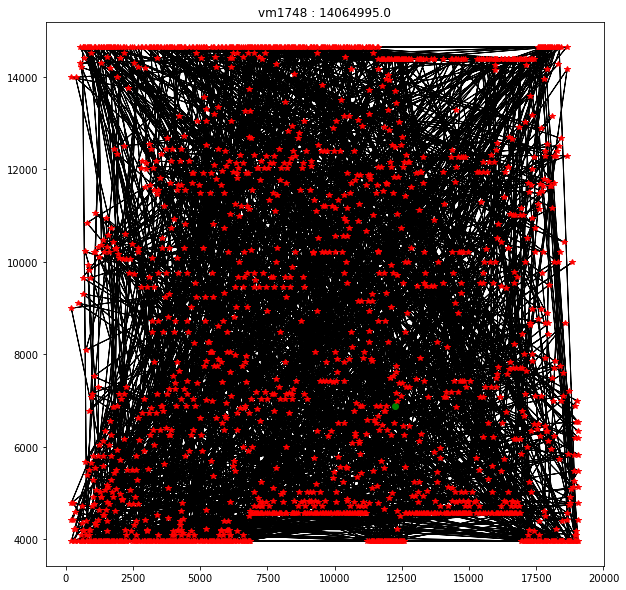

In [15]:
dataset = vm1748

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"vm1748")